### Unit 12_Tales from the Crypto 
#### There's been a lot of hype in the news lately about cryptocurrency. The following code will look at the latest news headlines regarding Bitcoin and Ethereum to get a better feel for the current public sentiment around each coin. Natural Language Processing techniques will be used to understand factors involved with the coin prices, such as common words and phrases and entities mentioned in the articles. 

In [1]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


#### 1. Sentiment Analysis
Using the newsapi, the latest news about Bitcoin and Ethereum have been pulled to create a dataframe of sentiment scores for each coin.

In [2]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/renatabal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
%load_ext dotenv
%dotenv

In [4]:
# Reading the News API key enviroment variable
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [6]:
# Fetch all the news about Bitcoin
btc_headlines = newsapi.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)



# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][0]

Total articles about Bitcoin: 8593


{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'Is Bitcoin a safe bet?',
 'description': 'The digital cryptocurrency Bitcoin has tripled in value in the past three years. Will the boom only lead to a bigger bust?',
 'url': 'https://www.cnn.com/videos/business/2021/02/20/is-bitcoin-a-safe-bet-smerconish-vpx.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/210220112649-smerconish-bitcoin-guests-split-super-tease.jpg',
 'publishedAt': '2021-02-20T17:12:04Z',
 'content': None}

In [7]:
# Fetch all the news about Etheruem
eth_headlines = newsapi.get_everything(
    q="Ethereum", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 1998


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [8]:
#Create the Bitcoin sentiment scores dataframe 
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
1,2021-03-03,,0.0000,0.000,0.000,0.000
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860
3,2021-02-12,"Miamis mayor, Francis Suarez, is champing at t...",0.1779,0.045,0.000,0.955
4,2021-02-12,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852


In [9]:
#Create the Ethereum sentiment scores dataframe 
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [10]:
#Describe the Bitcoin sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.288433,0.071000,0.004556,0.868889
std,0.305344,0.069076,0.019328,0.227516
min,-0.128000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.856250
50%,0.258950,0.068000,0.000000,0.917500
75%,0.559650,0.110000,0.000000,0.989500
max,0.831600,0.246000,0.082000,1.000000


In [11]:
#Describe the Ethereum sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.237070,0.074700,0.019200,0.906100
std,0.370410,0.062607,0.043104,0.070778
min,-0.458800,0.000000,0.000000,0.754000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.307100,0.073500,0.000000,0.915500
75%,0.473275,0.096500,0.000000,0.946750
max,0.831600,0.246000,0.145000,1.000000


### Anaylsis:
#### Q: Which coin had the highest mean positive score?
A: Ethereum had the highest mean positive score of 7.47%.

#### Q: Which coin had the highest compound score?
A: Ethereum had the highest compound score of 20. 

#### Q. Which coin had the highest positive score?
A:Ethereum had the highest positive score of 20. 

#### 2. Natural Language Processing - Tokenizer 
Using NLTK and Python, the text for Bitcoin and Ethereum will be tokenized to make sure each word is lowercase, remove punctuation and remove
stopwords. 

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [15]:
#Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
1,2021-03-03,,0.0000,0.000,0.000,0.000,[]
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"[bitcoin, future, morning, hit, alltime, high,..."
3,2021-02-12,"Miamis mayor, Francis Suarez, is champing at t...",0.1779,0.045,0.000,0.955,"[miamis, mayor, francis, suarez, champing, bit..."
4,2021-02-12,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852,"[jack, dorsey, jay, z, create, bitcoin, endowm..."


In [16]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co..."
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ..."
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[attempting, get, ahead, cryptocurrency, miner..."


### NGrams and Frequency Analysis

Using NLTK and Counter, we will look at the ngrams and frequency for each coin.

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
#Tokenize words in Bitcoin DataFrame 
btc_counter = tokenizer(btc_df.text.str.cat())
btc_counter

['thing',
 'best',
 'left',
 'mystery',
 'least',
 'far',
 'coinbase',
 'concernedthe',
 'san',
 'franciscobased',
 'cryptocurrency',
 'exchange',
 'ha',
 'preparing',
 'go',
 'public',
 'since',
 'last',
 'year',
 'thursday',
 'pro',
 'charsbitcoin',
 'future',
 'morning',
 'hit',
 'alltime',
 'high',
 'value',
 'lesson',
 'elon',
 'musks',
 'tweet',
 'good',
 'investment',
 'strategy',
 'get',
 'ha',
 'charsmiamis',
 'mayor',
 'francis',
 'suarez',
 'champing',
 'bit',
 'rebrand',
 'city',
 'tech',
 'entrepreneur',
 'tax',
 'dollar',
 'come',
 'wake',
 'latest',
 'branding',
 'effort',
 'involves',
 'push',
 'charsjack',
 'dorsey',
 'jay',
 'z',
 'create',
 'bitcoin',
 'endowment',
 'datadog',
 'acquires',
 'startup',
 'battlefield',
 'company',
 'buzzfeed',
 'experiment',
 'aigenerated',
 'quiz',
 'daily',
 'crunch',
 'february',
 'charsin',
 'case',
 'havent',
 'noticed',
 'bitcoins',
 'bit',
 'moment',
 'cryptocurrencys',
 'value',
 'reached',
 'record',
 'height',
 'recent',
 'we

In [19]:
#Tokenize words in Ethereum DataFrame 
eth_counter = tokenizer(eth_df.text.str.cat())
eth_counter

['worried',
 'geforce',
 'rtx',
 'sold',
 'cryptocurrency',
 'miner',
 'snap',
 'every',
 'gpu',
 'sight',
 'nvidia',
 'think',
 'ha',
 'simple',
 'way',
 'help',
 'make',
 'new',
 'card',
 'unattractive',
 'crypto',
 'crowd',
 'charsnfts',
 'latest',
 'cryptocurrency',
 'rage',
 'day',
 'band',
 'like',
 'kings',
 'leon',
 'releasing',
 'next',
 'album',
 'limited',
 'edition',
 'golden',
 'ticket',
 'nba',
 'digital',
 'collectible',
 'sold',
 'million',
 'charsnfts',
 'nonfungible',
 'token',
 'scarce',
 'digital',
 'content',
 'represented',
 'token',
 'driving',
 'new',
 'wave',
 'crypto',
 'adoptionthanks',
 'ethereum',
 'blockchain',
 'artist',
 'gaming',
 'company',
 'content',
 'cre',
 'charswhile',
 'first',
 'christies',
 'auction',
 'digital',
 'artwork',
 'backed',
 'nft',
 'nonfungible',
 'token',
 'still',
 'day',
 'away',
 'one',
 'notable',
 'sale',
 'world',
 'ha',
 'already',
 'taken',
 'place',
 'chris',
 'torres',
 'cr',
 'charsattempting',
 'get',
 'ahead',
 'cryp

In [20]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = Counter(ngrams(btc_counter, n=2))
btc_ngram

Counter({('thing', 'best'): 1,
         ('best', 'left'): 1,
         ('left', 'mystery'): 1,
         ('mystery', 'least'): 1,
         ('least', 'far'): 1,
         ('far', 'coinbase'): 1,
         ('coinbase', 'concernedthe'): 1,
         ('concernedthe', 'san'): 1,
         ('san', 'franciscobased'): 1,
         ('franciscobased', 'cryptocurrency'): 1,
         ('cryptocurrency', 'exchange'): 2,
         ('exchange', 'ha'): 1,
         ('ha', 'preparing'): 1,
         ('preparing', 'go'): 1,
         ('go', 'public'): 1,
         ('public', 'since'): 1,
         ('since', 'last'): 1,
         ('last', 'year'): 1,
         ('year', 'thursday'): 1,
         ('thursday', 'pro'): 1,
         ('pro', 'charsbitcoin'): 1,
         ('charsbitcoin', 'future'): 1,
         ('future', 'morning'): 1,
         ('morning', 'hit'): 1,
         ('hit', 'alltime'): 1,
         ('alltime', 'high'): 2,
         ('high', 'value'): 1,
         ('value', 'lesson'): 1,
         ('lesson', 'elon'): 1,
   

In [21]:
# Generate the Ethereum N-grams where N=2
eth_ngram = Counter(ngrams(eth_counter, n=2))

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10= token_count(btc_counter, 10)
btc_top10

[('ha', 7),
 ('bitcoin', 7),
 ('reuters', 6),
 ('cryptocurrency', 5),
 ('charsby', 4),
 ('exchange', 3),
 ('high', 3),
 ('value', 3),
 ('investment', 3),
 ('company', 3)]

In [24]:
# Use token_count to get the top 10 words for Ethereum 
eth_top10= token_count(eth_counter, 10)
eth_top10

[('reuters', 13),
 ('cryptocurrency', 8),
 ('bitcoin', 8),
 ('ha', 6),
 ('ethereum', 6),
 ('charsby', 6),
 ('new', 5),
 ('week', 5),
 ('high', 5),
 ('token', 4)]

### WordClouds

Using a WordCloud visualization, we will summarize the news for Bitcoin and Ethereum. 

In [25]:
#Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

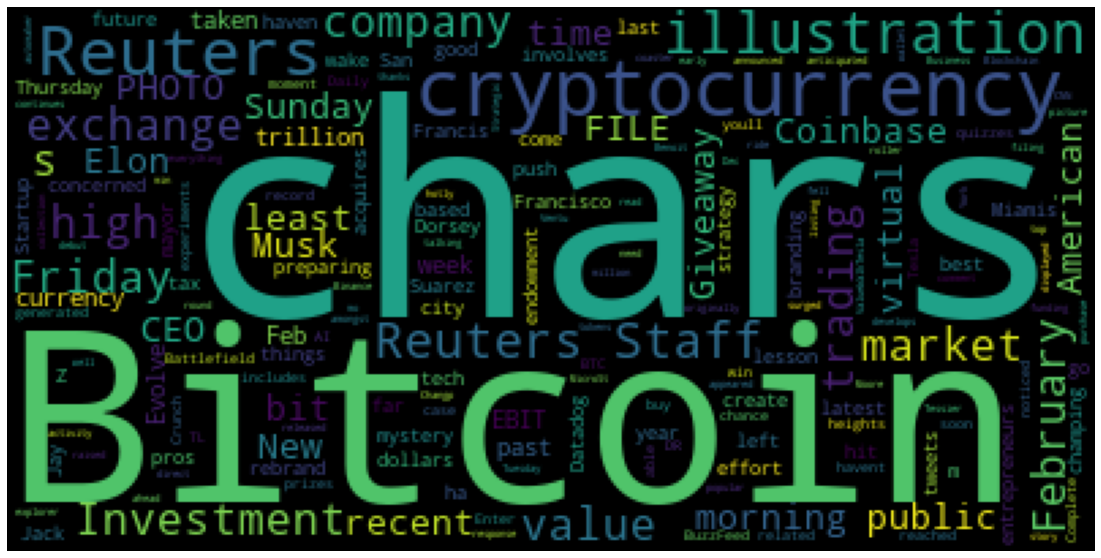

In [26]:
# Generate the Bitcoin word cloud
btc = WordCloud(background_color='black').generate(btc_df.text.str.cat())
btc
plt.axis("off")
plt.imshow(btc)

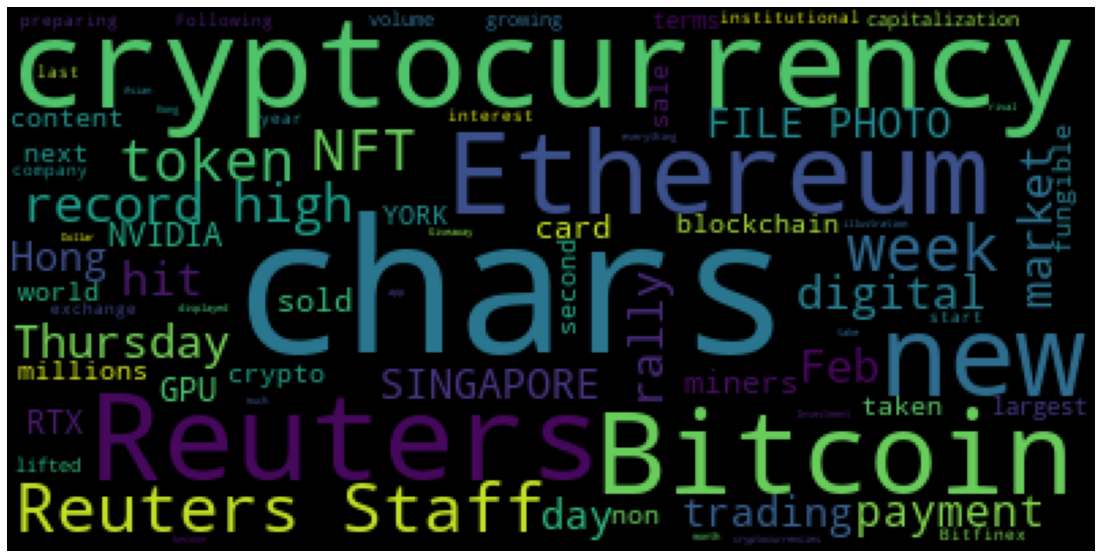

In [27]:
# Generate the Ethereum word cloud
eth = WordCloud(background_color='black').generate(eth_df.text.str.cat())
eth
plt.axis("off")
plt.imshow(eth)

#### 3. Named Entity Recognition 
Now we will build a named entity recognition model for both Bitcoin and Ethereum and then visualize the tags using SpaCy.

In [28]:
#Imports
import spacy
from spacy import displacy

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

#### Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
btc_concat = btc_df.text.str.cat()
btc_concat

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars]Miamis mayor, Francis Suarez, is champing at the bit to rebrand his city as a haven for tech entrepreneurs and the tax dollars that come in their wake. His latest branding effort involves a push to m… [+2454 chars]Jack Dorsey and Jay Z create a bitcoin endowment, Datadog acquires a Startup Battlefield company and BuzzFeed experiments with AI-generated quizzes. This is your Daily Crunch for February 12, 2021.\r\n… [+2805 chars]In case you havent noticed, Bitcoins having a bit of a moment. The cryptocurrencys value reached record heights in recent weeks, youll s

In [31]:
# Run the NER processor on all of the text
# Add a title to the document
btc_doc = nlp(btc_concat)
btc_doc
btc_doc.user_data["Title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [33]:
# List all Entities
for i in btc_doc.ents:
    print(i.text, i.label_)

Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Francis Suarez PERSON
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
chars]Blockchain.com ORG
$120 million MONEY
Moore Strategic Ventu PERSON
chars]This morning TIME
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
Feb. 19, 2021 DATE
Evolve WORK_OF_ART
week of February DATE
North American NORP
4 CARDINAL
Bitcoi

#### Ethereum NER 

In [34]:
# Concatenate all of the Ethereum text together
eth_concat = eth_df.text.str.cat()
eth_concat

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars]NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars]While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars]Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week, Nvi

In [35]:
# Run the NER processor on all of the text
# Add a title to the document
eth_doc = nlp(eth_concat)
eth_doc
eth_doc.user_data["Title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [37]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
